# Case Study 2 : Analyzing data from MovieLens

** Due Date: October 27, 2016 5:59PM**

*------------

## The MovieLens data sets

<img src="https://pbs.twimg.com/profile_images/378800000380161537/b6fa868dce43807d4e67462587d0b0d2_400x400.png">

http://grouplens.org/datasets/movielens/



In [1]:
from IPython.lib.display import YouTubeVideo

In [1]:
YouTubeVideo('dAjRNi6bhSE')

NameError: name 'YouTubeVideo' is not defined

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    member 1
    
    member 2
    
    ...

**Desired outcome of the case study.**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how the rate movies.
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* Chapter 2 (only the section on the MovieLens 1M Data Set), Chapter 5, Chapter 6,
and Chapter 8 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (available from the WPI library as an e-book).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!

**Case study assumptions:**
* You have access to a Python installation

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)
* If you need help installing them then you can refer to the Anaconda documentation of Chapter 1 of Python for Data Analysis book above 

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem 1 (20 points total): 

## (10 points) Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from http://grouplens.org/datasets/movielens/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame
* Store the data into an HDF5 file.

## (10 points) Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!


In [326]:
import pandas as pd
import numpy as np
%matplotlib inline
import h5py
import vincent
vincent.core.initialize_notebook()
pd.set_option("display.max_columns",None)
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('C:/Users/Praneeth/Downloads/ml-1m/users.dat', sep='::',engine='python',header=None,names=unames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('C:/Users/Praneeth/Downloads/ml-1m/ratings.dat', sep='::',engine='python',header=None,names=rnames)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('C:/Users/Praneeth/Downloads/ml-1m/movies.dat', sep='::',engine='python',header=None,names=mnames)

data = pd.merge(pd.merge(ratings, users), movies)
data.head()


,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [175]:
#Store the data into an HDF5 file
data_hdf = pd.HDFStore('data.h5')
data_hdf['data1'] = data
data_hdf.close()

In [181]:
x = pd.pivot_table(data,index=["title"],values=["rating"],aggfunc=[np.mean])
x = x[x.values >4.5]
print("no. of movies have an average rating over 4.5 =",len(x.index))
x.head()

no. of movies have an average rating over 4.5 = 21


,mean
,rating
title,
"Apple, The (Sib) (1998)",4.666667
"Baby, The (1973)",5.000000
Bittersweet Motel (2000),5.000000
"Close Shave, A (1995)",4.520548
Follow the Bitch (1998),5.000000


In [185]:
mean_ratings = data.pivot_table('rating',index = 'title',columns = 'gender',aggfunc = 'mean')

#Determine those title ranked high among females.
top_female_titles = mean_ratings.index[mean_ratings['F'] > 4.5]

# Extract those titles
top_female_movies = mean_ratings.ix[top_female_titles]
print ('Total movies with an average rating of over 4.5 among women:')
print (len(top_female_movies))
print ("\n")
print ('Examples (average ratings):')
top_female_movies[:5]


Total movies with an average rating of over 4.5 among women:
51


Examples (average ratings):


gender,F,M
title,,
24 7: Twenty Four Seven (1997),5.000000,3.750000
Among Giants (1998),4.666667,3.333333
Aparajito (1956),4.666667,3.857143
"Apple, The (Sib) (1998)",4.750000,4.600000
Ayn Rand: A Sense of Life (1997),5.000000,4.000000


In [188]:
mean_ratings = data.pivot_table('rating',index = 'title',columns = 'gender',aggfunc = 'mean')

# Determine which titles had high average ratings among men
top_male_titles = mean_ratings.index[mean_ratings['M'] > 4.5]

# Extract those titles
top_male_movies = mean_ratings.ix[top_male_titles]
print ('Total movies with an average rating of over 4.5 among men:') 
print (len(top_male_movies))
print ("\n")
print ('Examples (average ratings):')
top_male_movies[:5]

Total movies with an average rating of over 4.5 among men:
23


Examples (average ratings):


gender,F,M
title,,
Angela (1995),3.00,5.0
"Apple, The (Sib) (1998)",4.75,4.6
"Baby, The (1973)",NaN,5.0
"Bells, The (1926)",4.00,5.0
Dangerous Game (1993),4.00,5.0


In [189]:
# Restrict data to those with raters aged over 30
data_over30 = data.ix[data['age']>30]

# Use a pivot table to compute the median ratings by title on this restricted data
median_ratings = data_over30.pivot_table('rating',index = 'title',columns = ['gender'],aggfunc = 'median')

In [192]:
# Determine which movies had a high median among men and extract those titles
top_male_median_titles = median_ratings.index[median_ratings['M'] > 4.5]
top_male_median_movies = median_ratings.ix[top_male_median_titles]

print ('Total movies with an median rating of over 4.5 among men over 30:') 
print (len(top_male_median_movies))
print ("\n")
print ('Examples, median scores among people over 30:')
top_male_median_movies[:5]

Total movies with an median rating of over 4.5 among men over 30:
86


Examples, median scores among people over 30:


gender,F,M
title,,
42 Up (1998),4.0,5.0
All Quiet on the Western Front (1930),4.0,5.0
American Beauty (1999),4.0,5.0
Among Giants (1998),5.0,5.0
Angela (1995),3.0,5.0


In [195]:
# Determine which movies had a high median among men and extract those titles
top_female_median_titles = median_ratings.index[median_ratings['F'] > 4.5]
top_female_median_movies = median_ratings.ix[top_female_median_titles]

print ('Total movies with an median rating of over 4.5 among female over 30:') 
print (len(top_female_median_movies))
print ("\n")
print ('Examples, median scores among people over 30:')
top_female_median_movies[:5]

Total movies with an median rating of over 4.5 among female over 30:
149


Examples, median scores among people over 30:


gender,F,M
title,,
24 7: Twenty Four Seven (1997),5.0,3.0
"400 Blows, The (Les Quatre cents coups) (1959)",5.0,4.0
Across the Sea of Time (1995),5.0,NaN
"African Queen, The (1951)",5.0,4.0
After Life (1998),5.0,4.0


In [198]:
"""We propose the following definition of a "Popular" movie:
Above-average total number of ratings
Above-average rating among women (i.e. the movie's average rating among women is above the average of ALL ratings given by women)
Above-average rating among men ((i.e. the movie's average rating among men is above the average of ALL ratings given by men)"""
# Determine the overall total ratings and mean ratings per title
popularity_test = data.pivot_table('rating',index = 'title', aggfunc = [len, np.mean])

# Determine the mean ratings per title by gender
gender_popularity_test = data.pivot_table('rating',index = 'title', columns = 'gender', aggfunc = np.mean)

popularity_test[:5]

,len,mean
title,,
"$1,000,000 Duck (1971)",37,3.027027
'Night Mother (1986),70,3.371429
'Til There Was You (1997),52,2.692308
"'burbs, The (1989)",303,2.910891
...And Justice for All (1979),199,3.713568


In [199]:
gender_popularity_test[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [324]:
# Calculate total number of ratings for each title
ratings_by_title = data.groupby('title').size()

# Determine the average number of total ratings per title
average_total_ratings = sum(ratings_by_title)/len(ratings_by_title)

# Determine which titles had above average total ratings and isolate those titles.
high_total_titles = popularity_test.index[popularity_test['len'] >= average_total_ratings]
high_total = popularity_test.ix[high_total_titles]

high_total[:5]


,len,mean
title,,
"'burbs, The (1989)",303,2.910891
10 Things I Hate About You (1999),700,3.422857
101 Dalmatians (1961),565,3.596460
101 Dalmatians (1996),364,3.046703
12 Angry Men (1957),616,4.295455


In [201]:
# Determine the average of ALL ratings given by men and by women.
gender_average_ratings = data.pivot_table('rating', index = 'gender',aggfunc = np.mean)
gender_average_ratings

gender
F    3.620366
M    3.568879
Name: rating, dtype: float64

In [202]:
# Determine the titles with above average female ratings and isolate those titles among the movies with above average total ratings.
high_female_titles = gender_popularity_test.index[gender_popularity_test['F'] >= gender_average_ratings['F']]
high_total_female = high_total.ix[high_female_titles]

# Among the above isolated titles, determine those with above average male ratings and isolate those titles.
high_male_titles = gender_popularity_test.index[gender_popularity_test['M'] >= gender_average_ratings['M']]
high_total_female_male = high_total_female.ix[high_male_titles]

# Determine the popular movies, given the definition above.
from numpy import nan as NA
popular_movies = high_total_female_male.dropna(how = 'all')
popular_movies[:5]

,len,mean
title,,
12 Angry Men (1957),616.0,4.295455
"20,000 Leagues Under the Sea (1954)",575.0,3.702609
2001: A Space Odyssey (1968),1716.0,4.068765
"Abyss, The (1989)",1715.0,3.683965
"Adventures of Priscilla, Queen of the Desert, The (1994)",469.0,3.805970


In [203]:
# Given the popluar movies, determine the 10 most popular.
most_popular_movies = popular_movies.sort_values(by='mean',ascending = False)
most_popular_movies[:10]

,len,mean
title,,
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),628.0,4.560510
"Shawshank Redemption, The (1994)",2227.0,4.554558
"Godfather, The (1972)",2223.0,4.524966
"Close Shave, A (1995)",657.0,4.520548
"Usual Suspects, The (1995)",1783.0,4.517106
Schindler's List (1993),2304.0,4.510417
"Wrong Trousers, The (1993)",882.0,4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),470.0,4.491489
Raiders of the Lost Ark (1981),2514.0,4.477725


In [211]:
#Conjecture 1.) The older a person gets, the more difficult they are to please.
# Compute average rating by age group
age_avg_ratings = data.pivot_table('rating', index = 'age',aggfunc = np.mean)
age_avg_ratings

age
1     3.549520
18    3.507573
25    3.545235
35    3.618162
45    3.638062
50    3.714512
56    3.766632
Name: rating, dtype: float64

In [213]:
# Compute weighted average by weighting each rating by the total number of ratings that individual submits
avg_by_user = data.pivot_table('rating',index = ['age','user_id'], aggfunc = [ len , np.mean])
avg_by_user[:10]

avg_ratings = np.mean(avg_by_user['len'])

avg_by_user['weight'] = avg_by_user['len']/avg_ratings
avg_by_user['weighted_mean'] = avg_by_user['mean']*avg_by_user['weight']

age_avg_weighted_ratings = avg_by_user.pivot_table('weighted_mean', index = avg_by_user.index.droplevel(1), aggfunc = np.mean)
age_avg_weighted_ratings

age
1     2.627286
18    3.524510
25    4.040247
35    3.644629
45    3.340652
50    3.278268
56    2.321259
Name: weighted_mean, dtype: float64

In [214]:
# Compute average age per rating
avg_age_ratings = data.pivot_table('age', index = 'rating',aggfunc = np.mean)
avg_age_ratings

rating
1    27.411756
2    28.607603
3    29.730035
4    30.154405
5    30.221130
Name: age, dtype: float64

In [216]:
age_counts = data.pivot_table('title', index='age', columns='rating', aggfunc='count')
age_counts.rename(index={1: 'Under 18', 18: '18-24', 25: '25-34', 35: '35-44',
                                        45: '45-49', 50: '50-55', 56: '56+'}, inplace=True)
print ('Frequency of Age Groups Ratings')
print (age_counts)

Frequency of Age Groups Ratings
rating        1      2       3       4      5
age                                          
Under 18   2238   2983    6380    8808   6802
18-24     13063  22073   47601   60241  40558
25-34     23898  44817  104287  136824  85730
35-44      9067  20253   52990   71983  44710
45-49      3409   8437   22311   30334  19142
50-55      2948   5993   18465   26484  18600
56+        1551   3001    9163   14297  10768


In [217]:
#normalize
age_counts_norm = age_counts.div(age_counts.sum(1).astype(float), axis=0)
age_counts_norm

rating,1,2,3,4,5
age,,,,,
Under 18,0.082246,0.109625,0.234464,0.323693,0.249972
18-24,0.071174,0.120265,0.259355,0.328224,0.220981
25-34,0.060416,0.113301,0.263647,0.345903,0.216733
35-44,0.045562,0.101772,0.266277,0.361718,0.224670
45-49,0.040761,0.100881,0.266773,0.362704,0.228881
50-55,0.040668,0.082673,0.254725,0.365347,0.256587
56+,0.039995,0.077385,0.236282,0.368669,0.277669


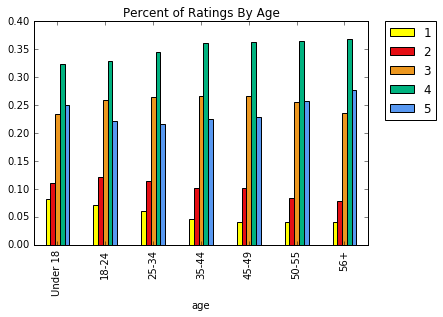

In [219]:
age_counts_norm.plot(ylim=[0,0.4],kind='bar', color=['yellow','#E50E14','#ec971f','#00b27f','#5898f1'],title = "Percent of Ratings By Age").legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Problem 2 (20 points total): Expand our investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.** 
* (2 points) Plot a histogram of the ratings of all movies.
* (2 points) Plot a histogram of the *number* of ratings each movie recieved.
* (2 points) Plot a histogram of the *average rating* for each movie.
* (6 points) Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* (8 points) Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

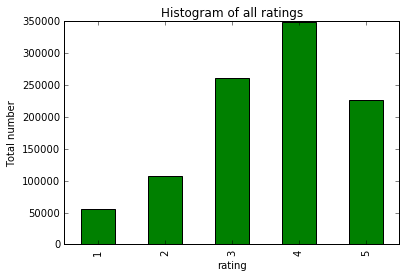

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------
#Plot a histogram of the ratings of all movies.
Rating_all=data.pivot_table('title',index='rating',aggfunc='count')
Rating_all.plot(kind='bar', color='green')
plt.title('Histogram of all ratings')
plt.ylabel('Total number')




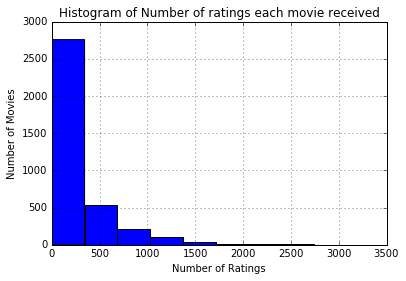

In [226]:
#Plot a histogram of the number of ratings each movie recieved.
Rating_each=data.pivot_table('rating',index='title',aggfunc='count')
Rating_each.hist()
plt.title('Histogram of Number of ratings each movie received')
plt.ylabel('Number of Movies')
plt.xlabel('Number of Ratings')

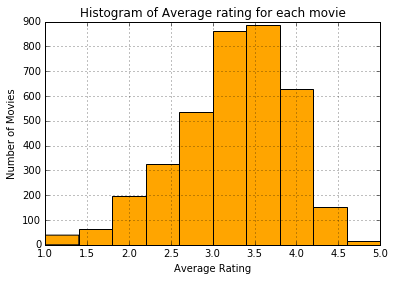

In [327]:
#Plot a histogram of the average rating for each movie.
Avg_rating_each=data.pivot_table('rating',index='title',aggfunc='mean')
Avg_rating_each.hist(color='orange')
plt.title('Histogram of Average rating for each movie')
plt.ylabel('Number of Movies')
plt.xlabel('Average Rating')

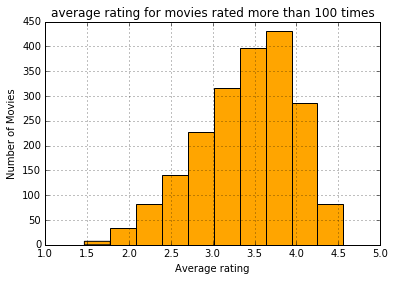

In [232]:
rating_by_title = data.groupby('title').size() 
active_titles = rating_by_title.index[rating_by_title > 100] 
avg_ratings_each_active = Avg_rating_each.ix[active_titles] 
avg_ratings_each_active.hist(color='orange')
plt.title('average rating for movies rated more than 100 times')
plt.ylabel('Number of Movies')
plt.xlabel('Average rating')
#tails go away, we would trust these ratings more (bigger sample size)

C:\Users\Praneeth\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


genres
Comedy                     24204
Drama                      17678
Comedy|Romance              7940
Comedy|Drama                7649
Action|Thriller             5632
Drama|Romance               4766
Horror                      4250
Drama|Thriller              3245
Action|Adventure|Sci-Fi     3173
Thriller                    2917
dtype: int64
     user_id  movie_id  rating   timestamp gender  age  occupation    zip  \
0          1      1193       5   978300760      F    1          10  48067   
6         19      1193       5   982730936      M    1          10  48073   
27        99      1193       2   982791053      F    1          10  19390   
103      349      1193       4  1007923963      M    1          10  08035   
203      719      1193       4   975527654      M    1           0  75070   

                                      title genres age_group comedy  hour  \
0    One Flew Over the Cuckoo's Nest (1975)  Drama  Under 18  False    17   
6    One Flew Over the Cuckoo's N

(array([ 2238.,  2983.,  6380.,  8808.,  6802.]),
 array([ 1. ,  1.8,  2.6,  3.4,  4.2,  5. ]),
 <a list of 5 Patch objects>)

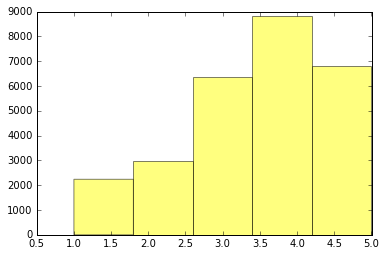

In [319]:
#*  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
#*  Be sure to come up with your own conjectures and support them with data!

labels = ['Under 18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+']
dat=data
dat['age_group'] = pd.cut(dat.age, bins=(0, 17, 24, 34, 44, 49, 55, 100), right=True, labels=labels)

#check all age blocks of 10 years
#kids
kids=data[(data.age_group=='Under 18')]
b=teens.groupby('genres').size()
b.sort(ascending=False)
print (b[:10])
print(kids.head())

#teens
teens=data[(data.age_group=='18-24')]

#20's
a20=data[(data.age_group=='25-34')]

#30's
a30=data[(data.age_group=='35-44')]

#40's
a40=data[(data.age_group=='45-49')]

#50's
a50=data[(data.age_group=='50-55')]

#plus
old=data[(data.age_group=='56+')]

plt.hist(kids['rating'], bins =5, alpha=0.5,color = 'yellow', label='kids')
#plt.hist(old['rating'], bins =5, alpha=0.5,color = 'black', label='old')
#plt.legend(loc='upper right')

#print(kids['rating'].hist(bins=5, color = 'red'))

#print(old['rating'].hist(bins=5,color = 'violet'))



In [287]:
rating_std_by_gender = data.groupby('gender')['rating'].std()
print (rating_std_by_gender)
rating_std_by_age = data.groupby('age_group')['rating'].std()
print (rating_std_by_age)

gender
F    1.111228
M    1.118724
Name: rating, dtype: float64
age_group
Under 18    1.208417
18-24       1.165970
25-34       1.127175
35-44       1.078101
45-49       1.065385
50-55       1.061380
56+         1.062551
Name: rating, dtype: float64


In [312]:
"""Conjecture 2: The distribution of all ratings of older movies is less normally-distributed than that of newer movies.
Newer movies are likely being watched by audiences looking to be entertained.Those watching 
older movies (i.e. movies made before 1960) likely have some nostalgia tied up in these older films."""
# Extract the year from the title

def extract(string, start='(', stop=')'):
        while string.index(stop) - (string.index(start)+1)!= 4:
            string = string[:string.index(start)] + string[string.index(stop)+1:]
        return string[string.index(start)+1:string.index(stop)]
    
titles = data['title']
year = [int(extract(title)) for title in titles]
year_series = pd.DataFrame(year, index=data.index)
data['year'] = year_series

data[:5]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,age_group,comedy,hour,drama,adventure,action,Inactive,year
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,Under 18,False,17,True,True,True,False,1975
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,56+,False,16,True,True,True,False,1975
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,25-34,False,18,True,True,True,False,1975
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,25-34,False,13,True,True,True,False,1975
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,50-55,False,1,True,True,True,False,1975


In [313]:
year_array = list(set(data['year'].values))
average_year = int(float(sum(year_array))/len(year_array))
average_year

1959

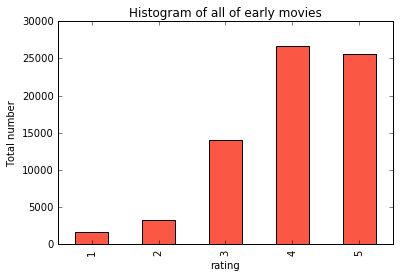

In [314]:
old_data = data[data['year']<= average_year]
old_rating_all=old_data.pivot_table('title',index='rating',aggfunc='count')
old_rating_all.plot(kind='bar', color='#FA5744')
plt.title('Histogram of all of early movies')
plt.ylabel('Total number')

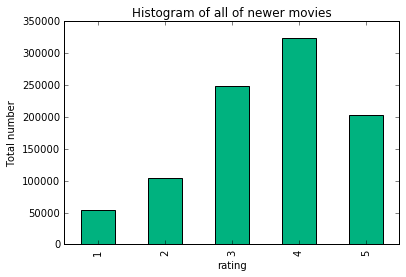

In [315]:
newer_data = data[data['year']>= average_year]
new_rating_all=newer_data.pivot_table('title',index='rating',aggfunc='count')
new_rating_all.plot(kind='bar', color='#00b27f')
plt.title('Histogram of all of newer movies')
plt.ylabel('Total number')

*------------------------

# Problem 3: (20 points total)
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* (2 points) Make a scatter plot of men versus women and their mean rating for every movie.
* (2 points) Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* (6 points) Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* (10 points) Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

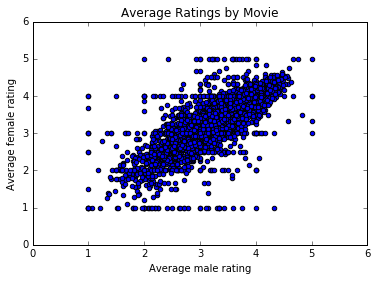

In [240]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

# Use a pivot table to compute mean ratings per title by gender
mean_ratings = data.pivot_table('rating',index = 'title',columns = 'gender',aggfunc = 'mean')

# Scatter this data.
plt.scatter(mean_ratings['M'], mean_ratings['F'])
plt.title('Average Ratings by Movie')
plt.ylabel('Average female rating')
plt.xlabel('Average male rating')




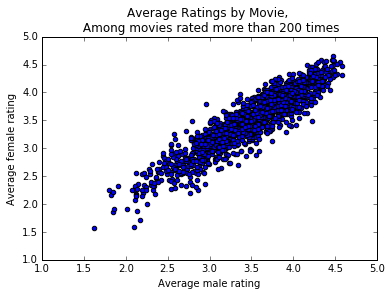

In [241]:
# Determine titles with more than 200 total ratings.
ratings_by_title = data.groupby('title').size()
active_titles = ratings_by_title.index[ratings_by_title > 200]

# Extract these titles
over_200_mean_ratings = mean_ratings.ix[active_titles]

#Produce scatter plot
plt.scatter(over_200_mean_ratings['M'], over_200_mean_ratings['F'])
plt.title('Average Ratings by Movie, \n Among movies rated more than 200 times')
plt.ylabel('Average female rating')
plt.xlabel('Average male rating')

In [243]:
# Compute the correlation coefficient
print ('correlation coefficient between averege male and female ratings: {0}'.format(mean_ratings.M.corr(mean_ratings.F)))

correlation coefficient between averege male and female ratings: 0.7631898908583273


In [245]:
# Based on scatter plots above, it is clear that men and women tend to agree more when the movies have a higher total number
# of ratings.  Calculate the correlation coeffcient in this case
print ('correlation coefficient between averege male and female ratings among movies with over 200 ratings: {0}'.format(
    over_200_mean_ratings.M.corr(over_200_mean_ratings.F)))

correlation coefficient between averege male and female ratings among movies with over 200 ratings: 0.9183613857026666


In [280]:
#Conjecture 1.) When they are tired Male and female rate more similarly 
import time

# Convert time stamps to local time and extract the hour.
timestamps = data['timestamp']
hour = [time.localtime(stamp).tm_hour for stamp in timestamps.values]
hour_series = pd.DataFrame(hour, index=data.index)
data['hour'] = hour_series
# Isolate data for ratings submitted between 10PM and 5AM local time
wee_hours_data = data[np.logical_or(data['hour']>= 22,data['hour']<=5)]

# Determine the average ratings per title by gender during these late-night hours.
wee_hours_mean_ratings = wee_hours_data.pivot_table('rating', index = 'title', columns = 'gender', aggfunc = np.mean)

wee_hours_mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",2.666667,3.000000
'Night Mother (1986),3.285714,3.666667
'Til There Was You (1997),2.750000,2.875000
"'burbs, The (1989)",2.956522,2.887097
...And Justice for All (1979),3.615385,3.613636


In [284]:
#Calculate the correlation coefficient.
print ('Correlation coefficient between averege male and female ratings between 10PM and 5AM: {0}'.format(
    wee_hours_mean_ratings.M.corr(wee_hours_mean_ratings.F)))
wee_hours_over_200_mean_ratings = wee_hours_mean_ratings.ix[active_titles]
wee_hours_over_200_mean_ratings[:5]

Correlation coefficient between averege male and female ratings between 10PM and 5AM: 0.6443696316466245


gender,F,M
title,,
"'burbs, The (1989)",2.956522,2.887097
10 Things I Hate About You (1999),3.693333,3.392857
101 Dalmatians (1961),3.780000,3.540984
101 Dalmatians (1996),3.216216,2.866667
12 Angry Men (1957),4.218750,4.307692


In [283]:
#Compute Correlation Coefficient
'Correlation coefficient between averege male and female ratings between 10PM and 5AM, among movies with at least 200 total ratings: {0}'.format(wee_hours_over_200_mean_ratings.M.corr(wee_hours_over_200_mean_ratings.F))

'Correlation coefficient between averege male and female ratings between 10PM and 5AM, among movies with at least 200 total ratings: 0.8654302643147277'

*------------------------

# Problem 4: (20 points total)
## Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer.
* Suppose you are a Data Sciencetist at a movie company.  **Convince your boss that your conjecture is correct!**

In [261]:

#Convert genres into 18 dummies. New dataset has total 100209 rows*28 columns 

#generate 18 dummies variables for movie genres
genre_iter=(set(x.split('|')) for x in movies.genres)
genres=sorted(set.union(*genre_iter))
dummies=pd.DataFrame(np.zeros((len(movies), len(genres))), columns=genres)
for i, gen in enumerate(movies.genres):
    dummies.ix[i,gen.split('|')]=1
movies_windic=movies.join(dummies)
movies_windic.ix[0]

# newdata has total 100209 rows 28 columns
newdata = pd.merge(pd.merge(pd.merge(ratings,users),movies), movies_windic)
newdata.columns

Index(['user_id', 'movie_id', 'rating', 'timestamp', 'gender', 'age',
       'occupation', 'zip', 'title', 'genres', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

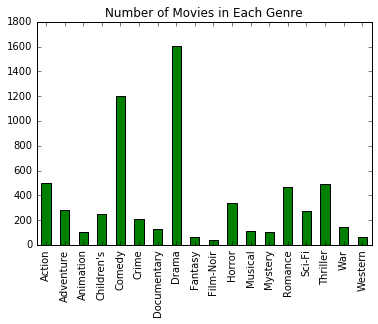

In [262]:
#How many movies for each genre are in this dataset?

moviegenre=movies_windic
moviegenre.drop(moviegenre[[0,1,2]],axis=1,inplace=True)
moviegenre.sum().plot(kind='bar',color='g')
plt.title('Number of Movies in Each Genre')

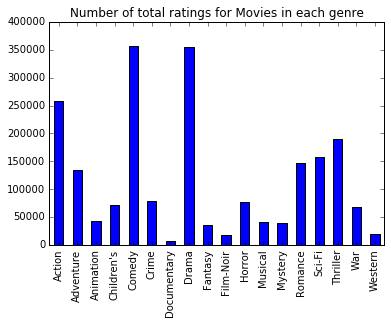

In [263]:
#Total number of ratings received for each type of movie
genres_rating_received=newdata
genres_rating_received.drop(genres_rating_received.columns[[0,1,2,3,4,5,6,7,8,9]], axis=1, inplace=True)
genres_rating_received.sum().plot(kind='bar')
plt.title('Number of total ratings for Movies in each genre')

In [264]:
average_ratings_genre = (genres_rating_received.sum())*moviegenre.sum()/sum(moviegenre.sum())
average_ratings_genre

Action         20209.249532
Adventure       5915.839419
Animation        709.389045
Children's      2827.510300
Comedy         66775.280899
Crime           2619.093477
Documentary      156.768102
Drama          88687.575999
Fantasy          385.216604
Film-Noir        125.387640
Horror          4088.701311
Musical          738.882959
Mystery          664.617353
Romance        10843.216760
Sci-Fi          6774.835206
Thriller       14563.445693
War             1529.238608
Western          219.482522
dtype: float64

In [265]:

# Percent of movies watched by each gender classified as comedies
genres = data['genres']
all_genres = [string.split('|') for string in genres]
comedy_truth =  [ 'Comedy' in genres for genres in all_genres]
comedy_series = pd.DataFrame(comedy_truth, index=data.index)
data['comedy'] = comedy_series

comedy_data = data.ix[data['comedy'] == True]

comedy_gender_counts = comedy_data.pivot_table('rating', index = 'gender', aggfunc = 'count')
total_gender_counts = data.pivot_table('rating', index = 'gender', aggfunc = 'count')


gender_counts = pd.concat([total_gender_counts,comedy_gender_counts],axis = 1)
gender_counts.columns = ['total_gender_counts', 'comedy_gender_counts']
gender_counts['comedy_gender_percent'] = gender_counts['comedy_gender_counts']/gender_counts['total_gender_counts']
gender_counts

,total_gender_counts,comedy_gender_counts,comedy_gender_percent
gender,,,
F,246440,96271,0.390647
M,753769,260309,0.345343


occupation
other                   3.492602
academic/educator       3.519583
artist                  3.504449
clerical/admin          3.601516
college/grad student    3.486563
customer service        3.474962
doctor/health care      3.585793
executive/managerial    3.517354
farmer                  3.481363
homemaker               3.579862
K-12 student            3.497200
lawyer                  3.549694
programmer              3.598924
retired                 3.663825
sales/marketing         3.553581
scientist               3.687170
self-employed           3.507570
technician/engineer     3.581290
tradesman/craftsman     3.445350
unemployed              3.401392
writer                  3.423004
Name: rating, dtype: float64
RANGE: 0.285778561855


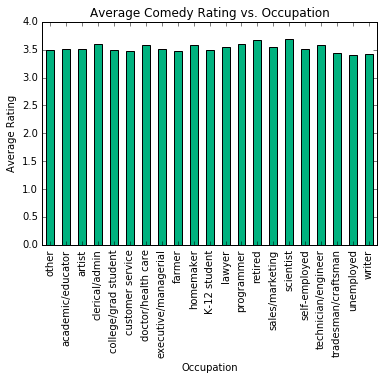

In [328]:
#Which occupation is most likely to enjoy a comedy?
# histogram of occupation vs count of comedy ratings
# Percent of movies watched by each gender classified as comedies
genres = data['genres']
all_genres = [string.split('|') for string in genres]
comedy_truth =  [ 'Comedy' in genres for genres in all_genres]
comedy_series = pd.DataFrame(comedy_truth, index=data.index)
data['comedy'] = comedy_series

comedy_data = data.ix[data['comedy'] == True]
job_avg_ratings = comedy_data.pivot_table('rating', index='occupation', aggfunc=np.mean)
job_avg_ratings.rename(index={0:'other', 1:'academic/educator',2: 'artist',3: 'clerical/admin',4: 'college/grad student',
                                  5: 'customer service',6: 'doctor/health care',7:'executive/managerial',8:'farmer',
                                  9: 'homemaker',10: 'K-12 student',11: 'lawyer',12 :'programmer',13: 'retired',
                                  14:'sales/marketing',15:'scientist',16: 'self-employed',17: 'technician/engineer',
                                  18: 'tradesman/craftsman',19 :'unemployed',20: 'writer'}, inplace=True)
print (job_avg_ratings)
print ("RANGE: %s" % (job_avg_ratings.max() - job_avg_ratings.min()))
job_avg_ratings.plot(kind='bar', color='#00b27f')
plt.title('Average Comedy Rating vs. Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Rating')

occupation
other                   46500
academic/educator       29949
artist                  17982
clerical/admin          11870
college/grad student    48672
customer service         7908
doctor/health care      13148
executive/managerial    35784
farmer                    939
homemaker                5065
K-12 student             9465
lawyer                   7526
programmer              19697
retired                  4340
sales/marketing         17898
scientist                7771
self-employed           15787
technician/engineer     24554
tradesman/craftsman      4172
unemployed               5461
writer                  22092
Name: title, dtype: int64


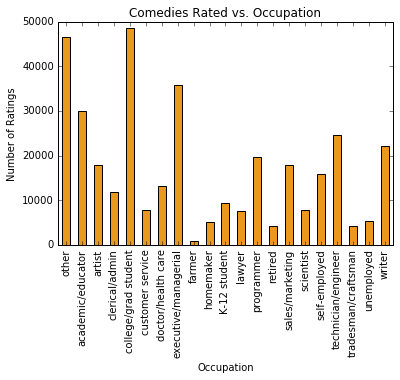

In [271]:
job_total_comedy_ratings = comedy_data.pivot_table('title', index='occupation', aggfunc='count')
job_total_comedy_ratings.rename(index={0:'other', 1:'academic/educator',2: 'artist',3: 'clerical/admin',4: 'college/grad student',
                                  5: 'customer service',6: 'doctor/health care',7:'executive/managerial',8:'farmer',
                                  9: 'homemaker',10: 'K-12 student',11: 'lawyer',12 :'programmer',13: 'retired',
                                  14:'sales/marketing',15:'scientist',16: 'self-employed',17: 'technician/engineer',
                                  18: 'tradesman/craftsman',19 :'unemployed',20: 'writer'}, inplace=True)
print (job_total_comedy_ratings)
job_total_comedy_ratings.plot(kind='bar', color='#ec971f')
plt.title('Comedies Rated vs. Occupation')
plt.xlabel('Occupation')
plt.ylabel('Number of Ratings')

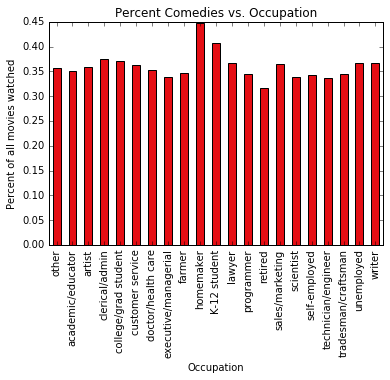

In [329]:
job_total_ratings = data.pivot_table('title', index='occupation', aggfunc='count')
job_total_ratings.rename(index={0:'other', 1:'academic/educator',2: 'artist',3: 'clerical/admin',4: 'college/grad student',
                                  5: 'customer service',6: 'doctor/health care',7:'executive/managerial',8:'farmer',
                                  9: 'homemaker',10: 'K-12 student',11: 'lawyer',12 :'programmer',13: 'retired',
                                  14:'sales/marketing',15:'scientist',16: 'self-employed',17: 'technician/engineer',
                                  18: 'tradesman/craftsman',19 :'unemployed',20: 'writer'}, inplace=True)

job_percent_comedy_ratings = job_total_comedy_ratings / job_total_ratings
job_percent_comedy_ratings.plot(kind='bar', color='#E50E14')
plt.title('Percent Comedies vs. Occupation')
plt.xlabel('Occupation')
plt.ylabel('Percent of all movies watched')

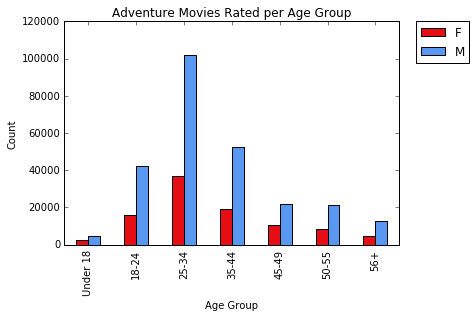

In [275]:
#What age group watches the most adventure movies?
# histogram of age group vs adventure genre
genres = data['genres']
all_genres = [string.split('|') for string in genres]
adventure_truth =  [ 'adventure' in genres for genres in all_genres]
adventure_series = pd.DataFrame(drama_truth, index=data.index)
data['adventure'] = adventure_series

adventure_data = data.ix[data['adventure'] == True]
adventure_ratings_per_age = adventure_data.pivot_table('title', index='age', columns='gender', aggfunc='count')
adventure_ratings_per_age.rename(index={1: 'Under 18', 18: '18-24', 25: '25-34', 35: '35-44',
                                        45: '45-49', 50: '50-55', 56: '56+'}, inplace=True)
adventure_ratings_per_age.plot(kind='bar', color=['#E50E14','#5898f1'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Adventure Movies Rated per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

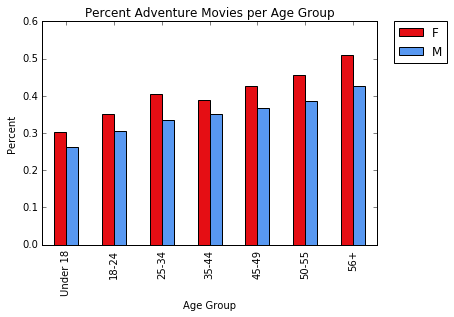

In [276]:
total_per_age = data.pivot_table('title', index='age', columns='gender', aggfunc='count')
total_per_age.rename(index={1: 'Under 18', 18: '18-24', 25: '25-34', 35: '35-44',
                                        45: '45-49', 50: '50-55', 56: '56+'}, inplace=True)
adventure_percent = adventure_ratings_per_age / total_per_age
adventure_percent.plot(kind='bar', color=['#E50E14','#5898f1'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Percent Adventure Movies per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percent')

In [278]:
print (adventure_ratings_per_age)
print (total_per_age)
print (adventure_percent)

gender        F       M
age                    
Under 18   2671    4812
18-24     15977   42127
25-34     37052  101643
35-44     19239   52351
45-49     10287   21854
50-55      8237   21010
56+        4690   12579
gender        F       M
age                    
Under 18   8827   18384
18-24     45427  138109
25-34     91340  304216
35-44     49473  149530
45-49     24110   59523
50-55     18064   54426
56+        9199   29581
gender           F         M
age                         
Under 18  0.302594  0.261749
18-24     0.351707  0.305027
25-34     0.405649  0.334115
35-44     0.388879  0.350104
45-49     0.426669  0.367152
50-55     0.455990  0.386029
56+       0.509838  0.425239


# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report, **but no source code**)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Send an email to rcpaffenroth@wpi.edu and wliu3@wpi.edu with the subject: "[DS501] Case study 2-TEAM NUMBER ???".